In [12]:
!rm extras/MOD05_L2.A2005349.2125.061.2017294065400_stare.nc
!createSidecarFile extras/MOD05_L2.A2005349.2125.061.2017294065400.hdf-1

calculating perimeter
perimeter size = 1348, pk = -1
cover size = 7221
Cell_Along_Swath_1km
Cell_Across_Swath_1km
Cell_Along_Swath_5km
Cell_Across_Swath_5km
QA_Bytes_IR
QA_Bytes_NIR
writing covers
writing cover i = 0, name = 1km


In [2]:
import pystare as ps

import matplotlib as mpl
# mpl.rcParams['agg.path.chunksize'] = 10000
# mpl.rcParams['agg.path.chunksize'] = 10000000
# mpl.use("Agg")

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs
import cartopy.feature as cf

import numpy
import shapely

from PIL import Image
Image.MAX_IMAGE_PIXELS = None

# import geopandas

from netCDF4 import Dataset



In [3]:
# Some helper functions for plotting & printing.

class figax_container(object):
    def __init__(self,figax):
        self.fig = figax[0]
        self.ax  = figax[1]
        return

def add_coastlines(figax,set_global=False):
    "Add coastlines to the plot."
    ax = figax.ax
    if set_global:
        ax.set_global()
    ax.coastlines()
    return figax

def hello_plot(
        spatial_index_values=None
        ,figax=None
        ,plot_options={'projection':ccrs.PlateCarree(),'transform':ccrs.Geodetic()}
        ,set_global=False
        ,set_coastlines=True
        ,show=True
        ,color=None
        ,lw=1
        ):

    if figax is None:
        figax = figax_container(plt.subplots(1,subplot_kw=plot_options))
        if set_global:
            figax.ax.set_global()
        if set_coastlines:
            figax.ax.coastlines()
    else:
        ax = figax.ax
    
    if spatial_index_values is not None:
        # Calculate vertices and interconnection matrix
        lons,lats,intmat = ps.triangulate_indices(spatial_index_values)
        
        # Make triangulation object & plot
        siv_triang = tri.Triangulation(lons,lats,intmat)
        figax.ax.triplot(siv_triang,c=color,transform=plot_options['transform'],lw=lw)
    
    if show:
        plt.show()
        
    return figax

def hex16(i):
    return "0x%016x"%i

def lonlat_from_coords(coords):
    tmp = numpy.array(coords)
    lat=tmp[:,1]
    lon=tmp[:,0]
    return lon,lat

km  = 1 # Unit of length
deg = 1 # Unit of angle

In [4]:
# Set up the projection and transformation
proj         = ccrs.PlateCarree()
# proj        = ccrs.Robinson() # Drives matplotlib bug.
# proj        = ccrs.Mollweide() # Drives matplotlib bug.
transf       = ccrs.Geo
plot_options = {'projection':proj,'transform':transf}

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = 1.5*default_dpi

In [13]:
ds = Dataset('extras/MOD05_L2.A2005349.2125.061.2017294065400_stare.nc')
lat0 = ds['Latitude_1km'][:,:].flatten()
lon0 = ds['Longitude_1km'][:,:].flatten()
spatial_id0 = ds['STARE_index_1km'][:,:].flatten().astype(numpy.int64)
print('ds shape: ',ds['Latitude_1km'].shape)


ds shape:  (406, 270)


In [14]:
def plot_segment(i0,i1,figax):
    lat = lat0[i0:i1]
    lon = lon0[i0:i1]
    spatial_id = spatial_id0[i0:i1]
    figax = hello_plot(spatial_id,figax=figax,show=False)
    figax.ax.scatter([lon],[lat],s=1,c='r')
    return figax
    


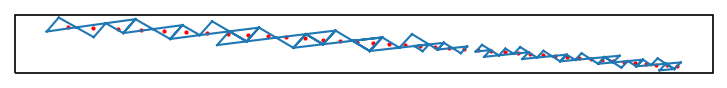

In [15]:
# Plot the trixel associated with the spatial index value
# figax = hello_plot(show=False)
figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))
for i in range(1):
    figax = plot_segment(i*270,i*270+40,figax)
    # figax = plot_segment(i*270,i*270+406,figax)

mpl.rcParams['agg.path.chunksize'] = 100000
plt.show()

In [16]:
list(map(hex,spatial_id0[0:200:10]))

['0x300a70ed23bb2e69',
 '0x300b9b597040baa9',
 '0x300fb5c5678a1d4a',
 '0x300eaab5648e706a',
 '0x300917265413146a',
 '0x2c109499df1412ea',
 '0x2c11eee567863bca',
 '0x2c11badfe206eaab',
 '0x2c69cc171ccd7c2b',
 '0x2c6998222c02e70b',
 '0x2c695e89451225cb',
 '0x2c6e8b4f5ba4e64b',
 '0x2c6c8e6130f4d84b',
 '0x2c6ccb7b3a24cdeb',
 '0x2c4b2121e963f4ab',
 '0x2c4a5eb9525ccc8b',
 '0x2c4a75d44e0d8b0b',
 '0x2c5814048156f06b',
 '0x2c544dfe94f0514b',
 '0x2c55bf66e04a1ecb']

In [17]:
ds.variables.keys()

dict_keys(['Latitude_1km', 'Longitude_1km', 'STARE_index_1km', 'STARE_cover_1km'])

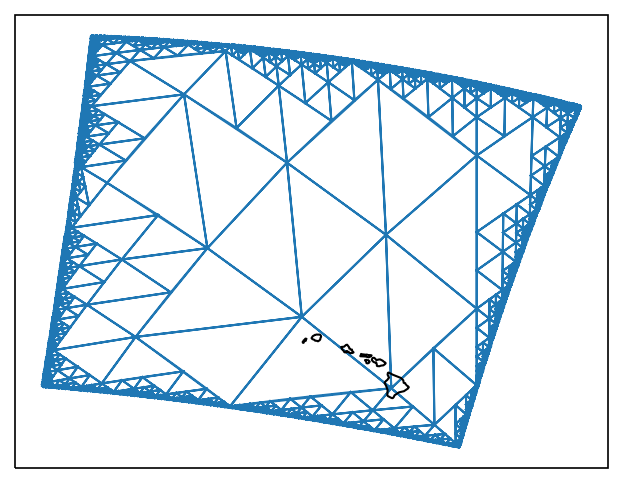

In [18]:
cover = ds['STARE_cover_1km'][:].astype(numpy.int64)
hello_plot(cover)